<a href="https://colab.research.google.com/github/asfkfjhe/Deep-learning-models-v1/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification using Deep learning

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


## Loading the MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits 

In [32]:
(train_X, train_y), (valid_X, valid_y)=keras.datasets.mnist.load_data()

In [33]:
train_X.shape

(60000, 28, 28)

In [34]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [35]:
train_y[0]

5

In [37]:
train_X=train_X/255
valid_X=valid_X/255

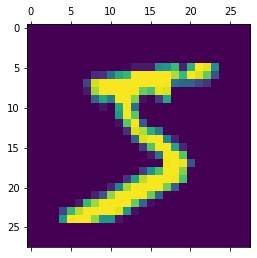

In [36]:
plt.matshow(train_X[0])

## Building model

In [82]:
from keras import layers
model= keras.Sequential([
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid' )
])

model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

model.fit(train_X, train_y, batch_size=50, epochs=5  )

Epoch 1/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.3034 - accuracy: 0.9158
Epoch 2/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1385 - accuracy: 0.9593
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0987 - accuracy: 0.9708
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0756 - accuracy: 0.9780
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9823


In [83]:
model.evaluate(valid_X, valid_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9732


[0.0810350850224495, 0.9732000231742859]

## Predictions

In [84]:
y_predicted=model.predict(valid_X)

313/313 [==============================] - 0s 1ms/step


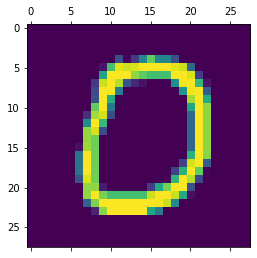

In [85]:
plt.matshow(valid_X[10])

In [87]:
y_predicted[10]

array([9.9998438e-01, 3.1212239e-05, 5.7617575e-01, 4.9411356e-02,
       4.8135585e-06, 5.0237483e-01, 4.4467401e-02, 9.3244184e-03,
       9.4778305e-03, 2.4606945e-01], dtype=float32)

#### The output above returns 10 values corresponding to values between 0-10 which corresponds the probability of the handwritten digits to `0 1 2 3 4 5 6 7 8 9` respectively. 
#### We find the maximum value to find which digit, the handwritten image mostly resembles according to our model.

In [88]:
np.argmax(y_predicted[10])

0

#### Using confusion matrix

In [89]:
predicted_y_labels=[np.argmax(i) for i in y_predicted]

In [90]:
confusion_matrix=tf.math.confusion_matrix(labels=valid_y, predictions=predicted_y_labels)

Text(69.0, 0.5, 'Truth')

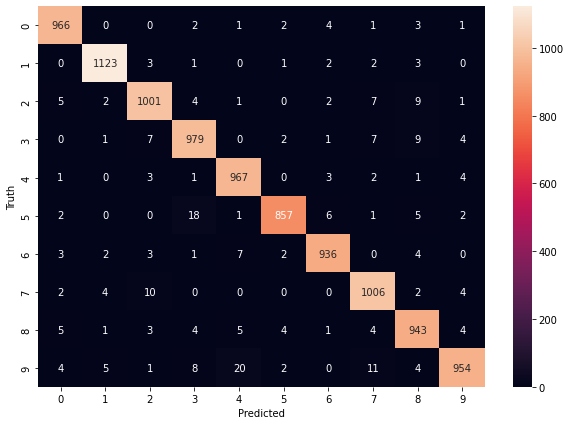

In [91]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')